In [1]:
import numpy as np
import pandas as pd
import utils

import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn.objects as so

In [2]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [3]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'

In [4]:
predVar = 'auc_pred_accuracy'
df_ = df.copy()
df_ = df_.melt(['participant', 'actual control', 'angular bias', 'group'], ['accuracy', predVar], 
               var_name='acc_type',
               value_name='acc')
df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group', 'acc_type']).mean()
df_ = df_.reset_index()

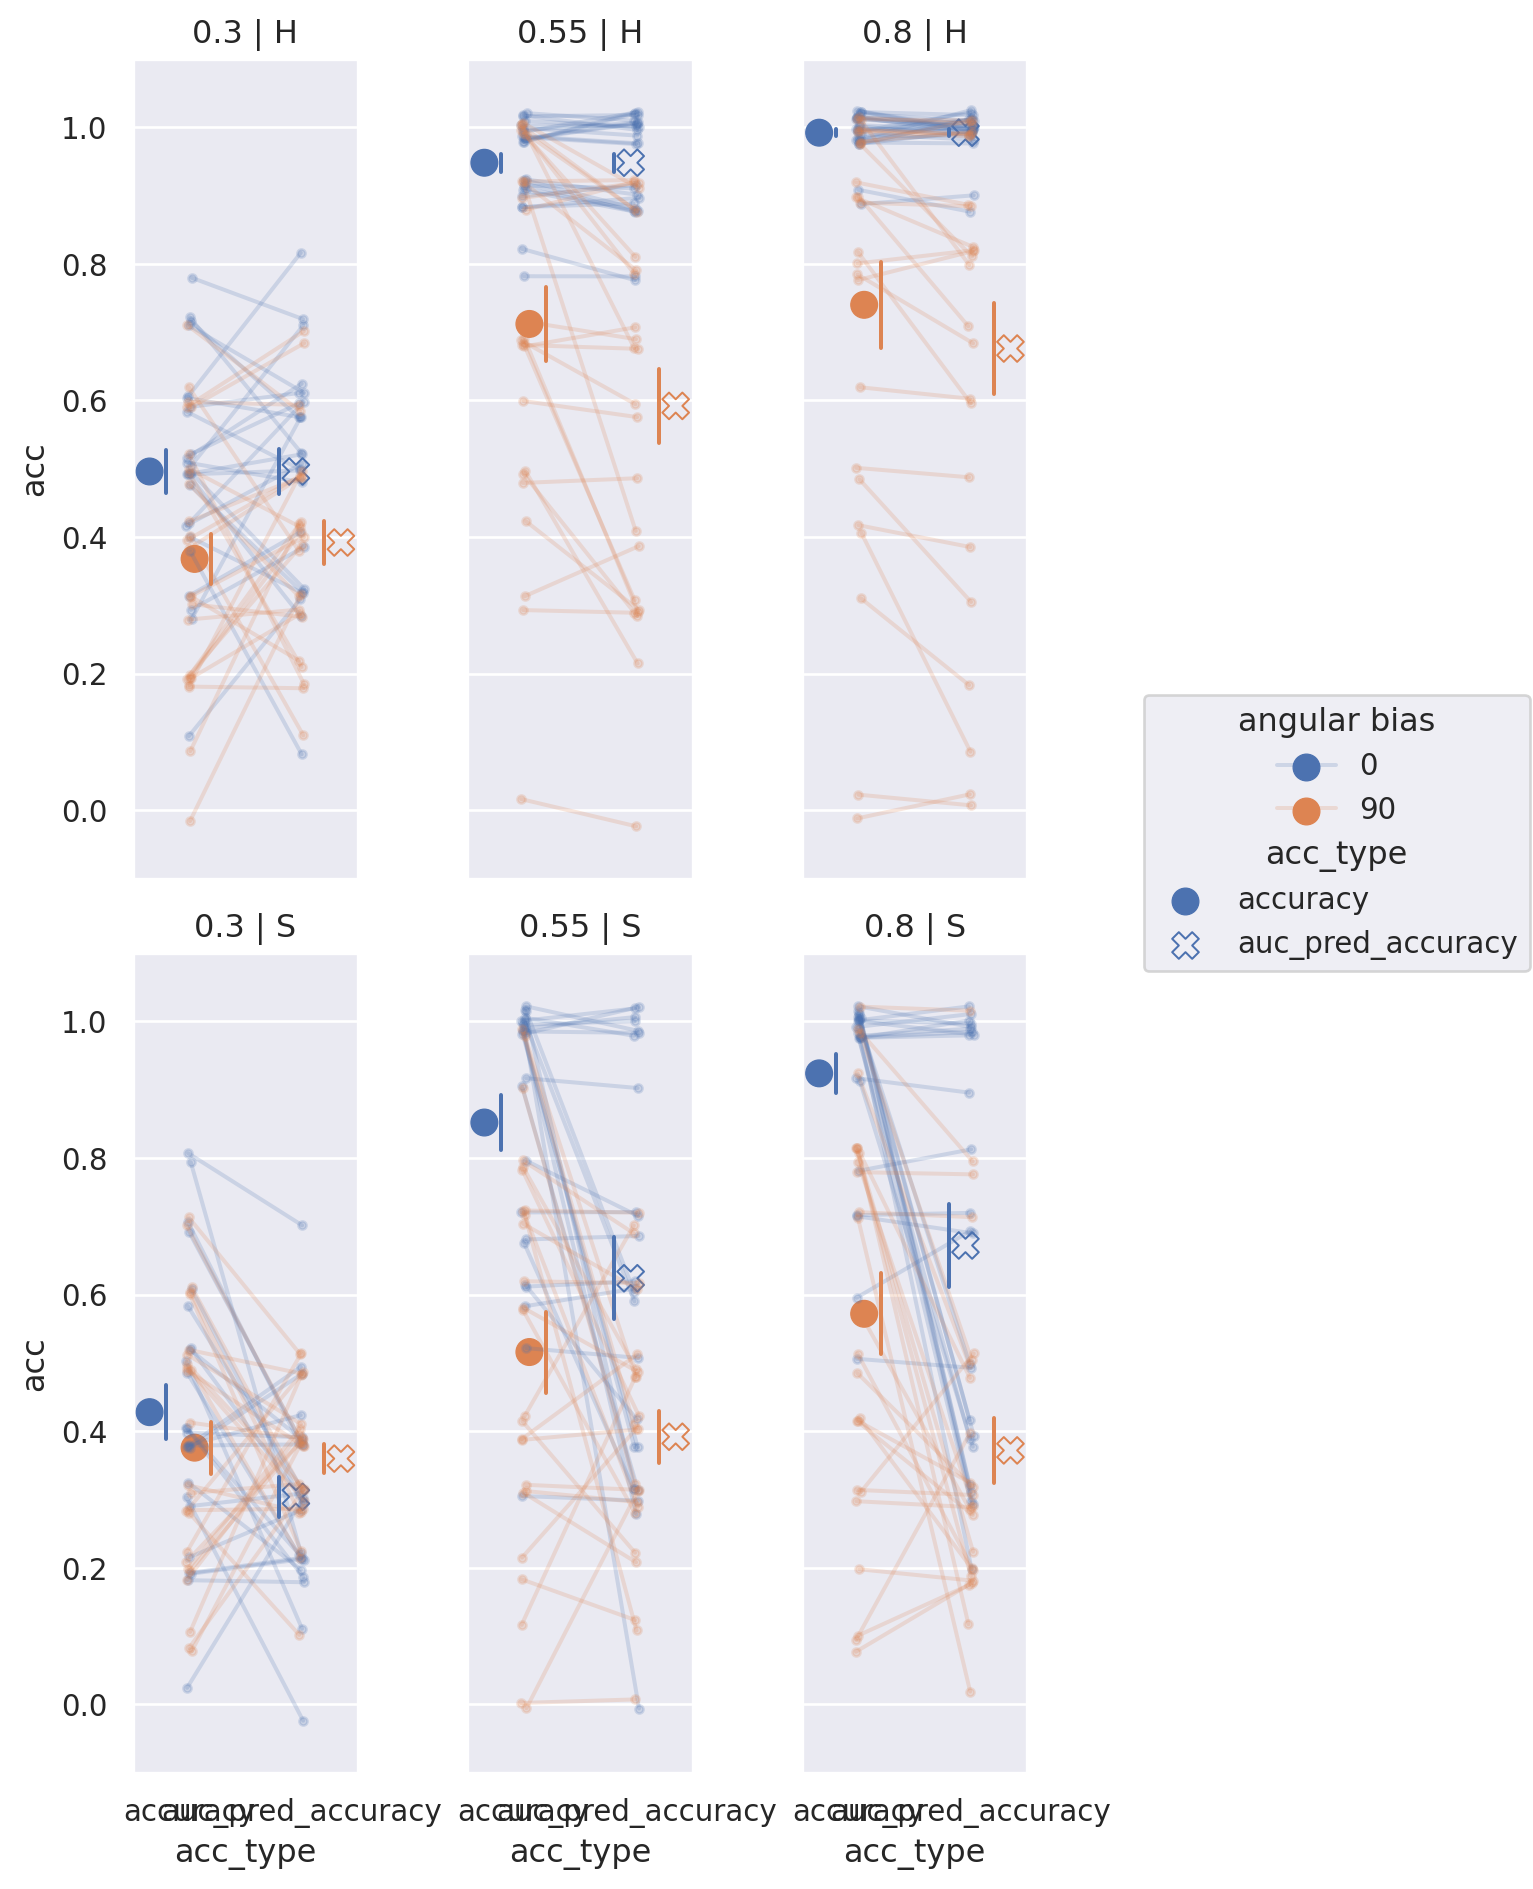

In [37]:
# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['acc', 'actual control', 'angular bias', 'acc_type']

g = (
    so.Plot(df_, x='acc_type', y='acc', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    # .pair(x=["actual control", 'angular bias'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='.'), so.Agg(),  so.Jitter(x=.05, y=.05), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Dot(pointsize=10), so.Agg(), so.Dodge(), marker='acc_type', fill='acc_type')
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .facet(row="group", col='actual control')
    .layout(size=(6, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
  
)

print(g)
fn = utils.Save.savepath('report_three_dot_prediction_group', 'real_pred_group_performce.pdf')
g.save(fn)


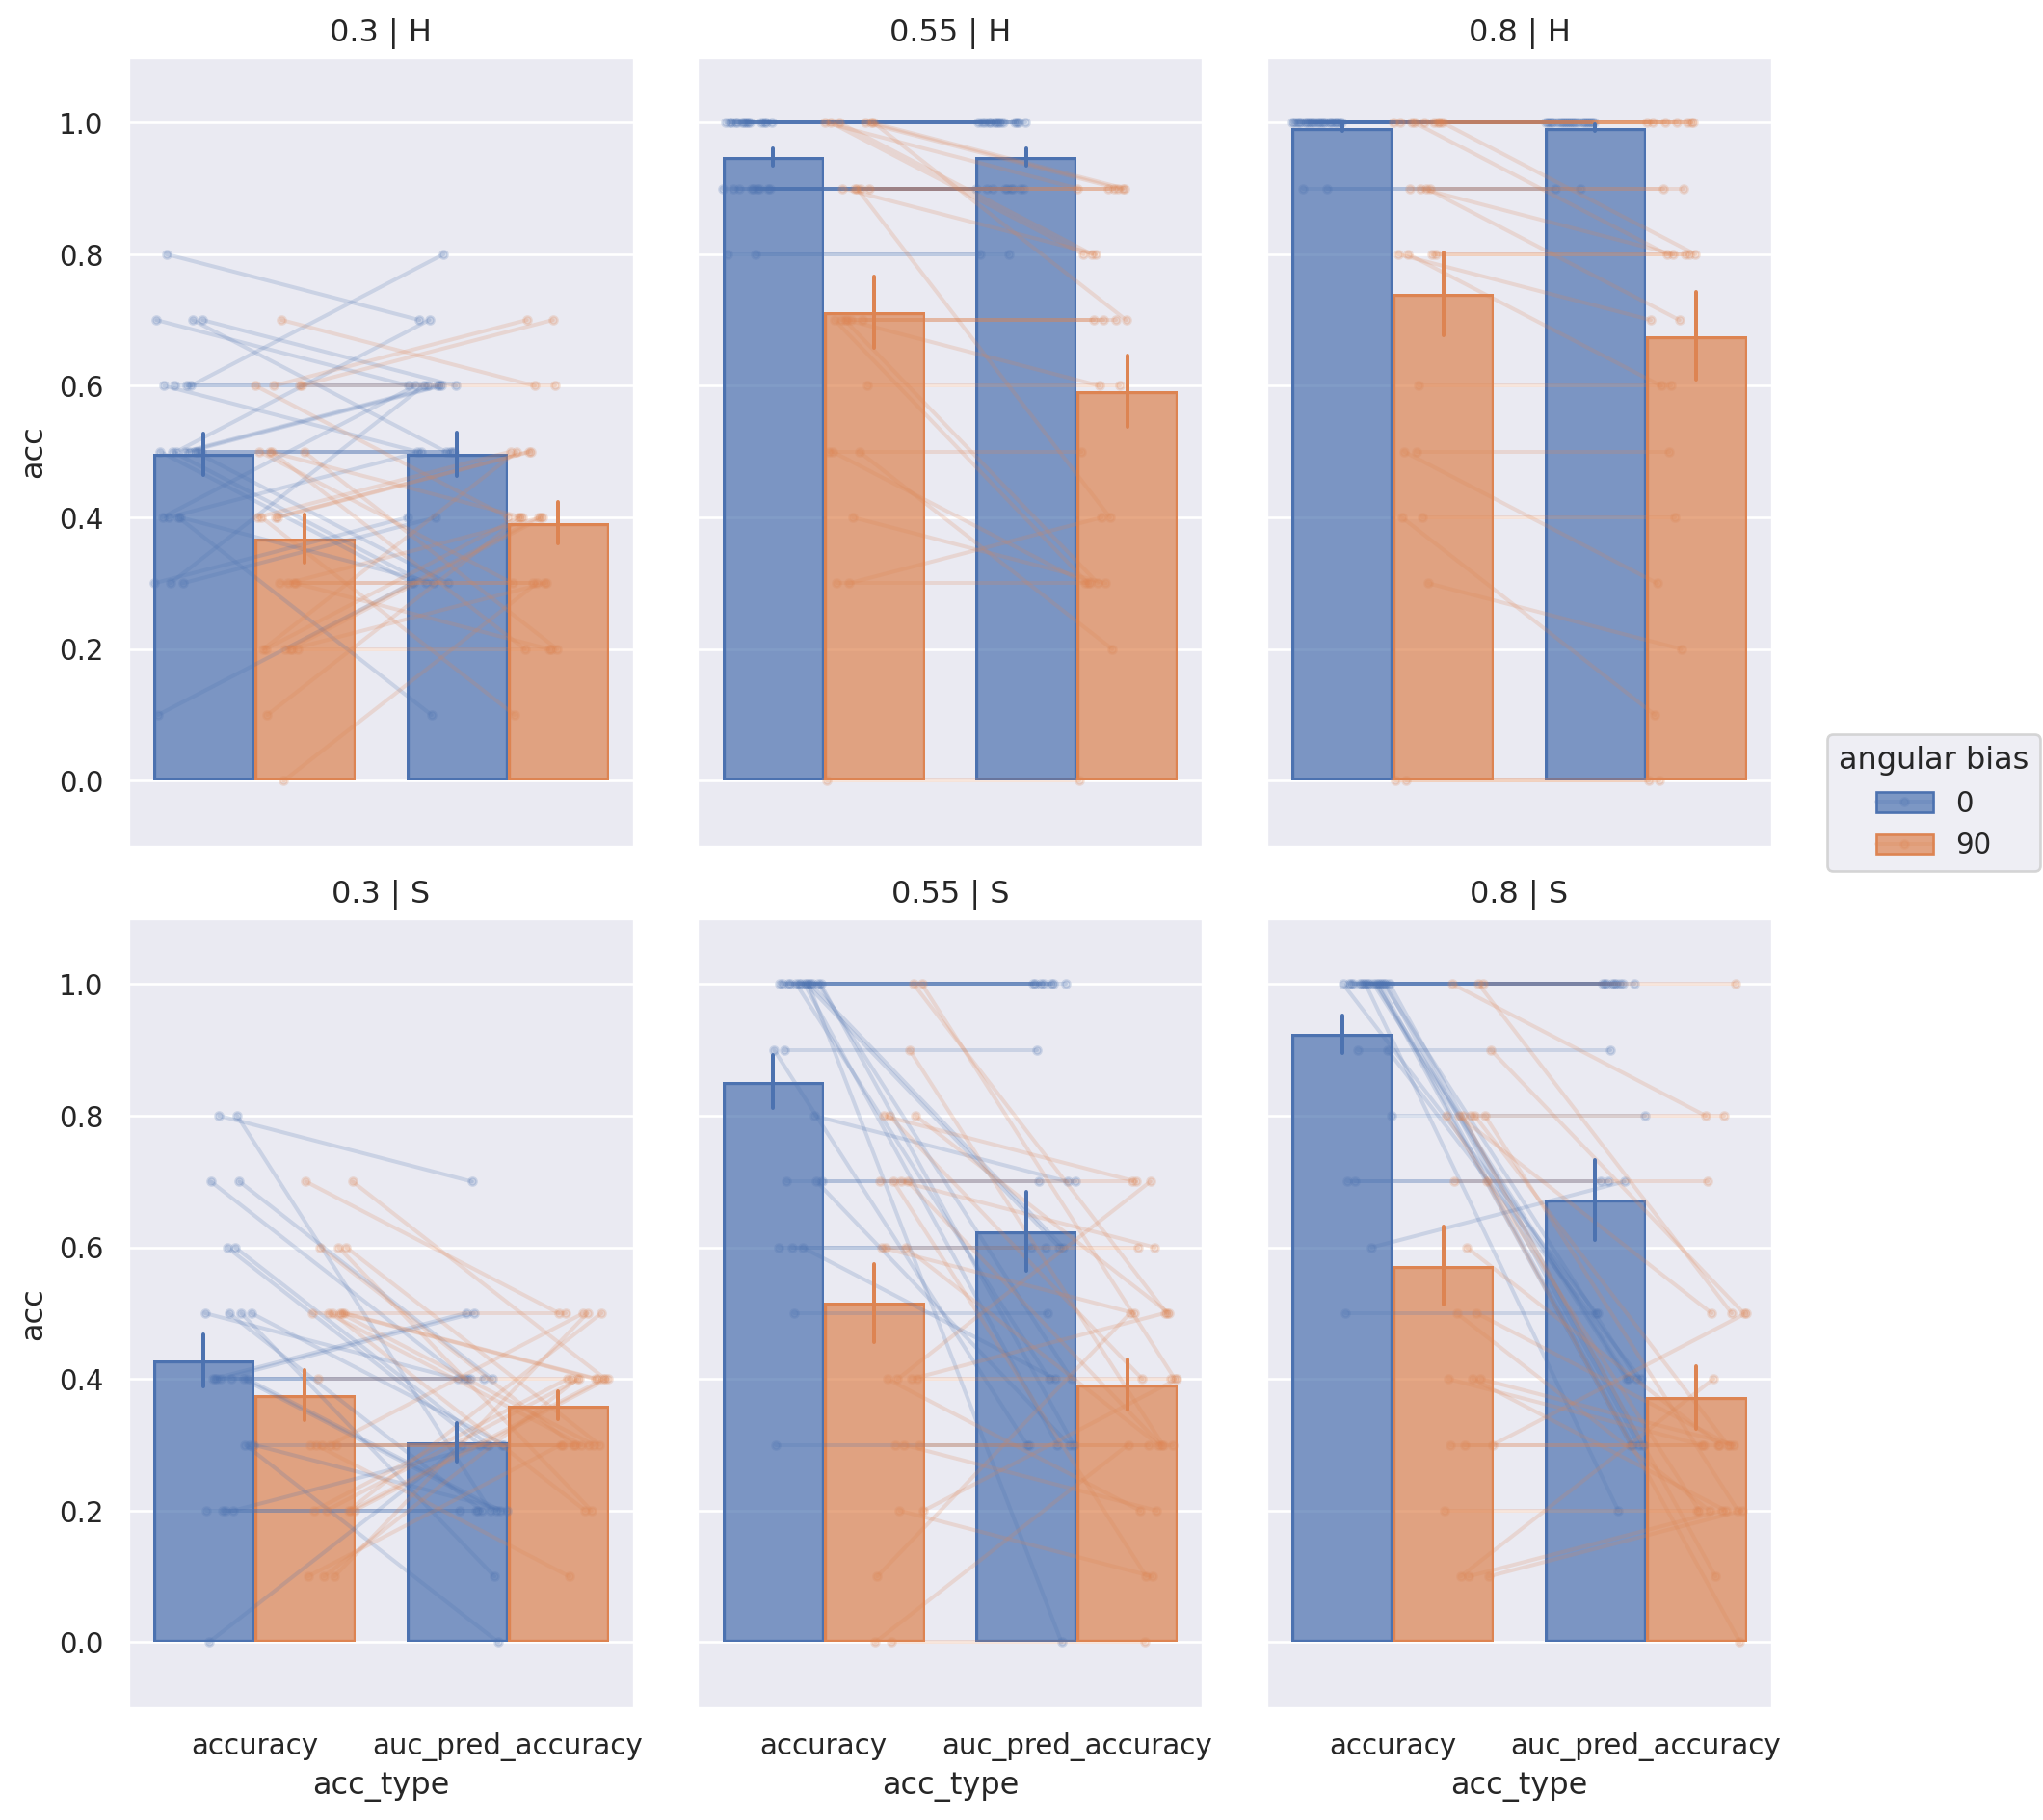

In [34]:

# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['acc', 'actual control', 'angular bias', 'acc_type']

g = (
    so.Plot(df_, x='acc_type', y='acc', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    # .pair(x=["actual control", 'angular bias'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='.'), so.Agg(),  so.Dodge(), so.Jitter(x=0, y=0), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Bar(), so.Agg(), so.Dodge())

    # .add(so.Dot(pointsize=10), so.Agg(), so.Dodge(), marker='acc_type')
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .facet(row="group", col='actual control')
    .layout(size=(10, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
  
)
g
# print(g)
# fn = utils.Save.savepath('report_three_dot_prediction_group', 'real_pred_group_performce.pdf')
# g.save(fn)


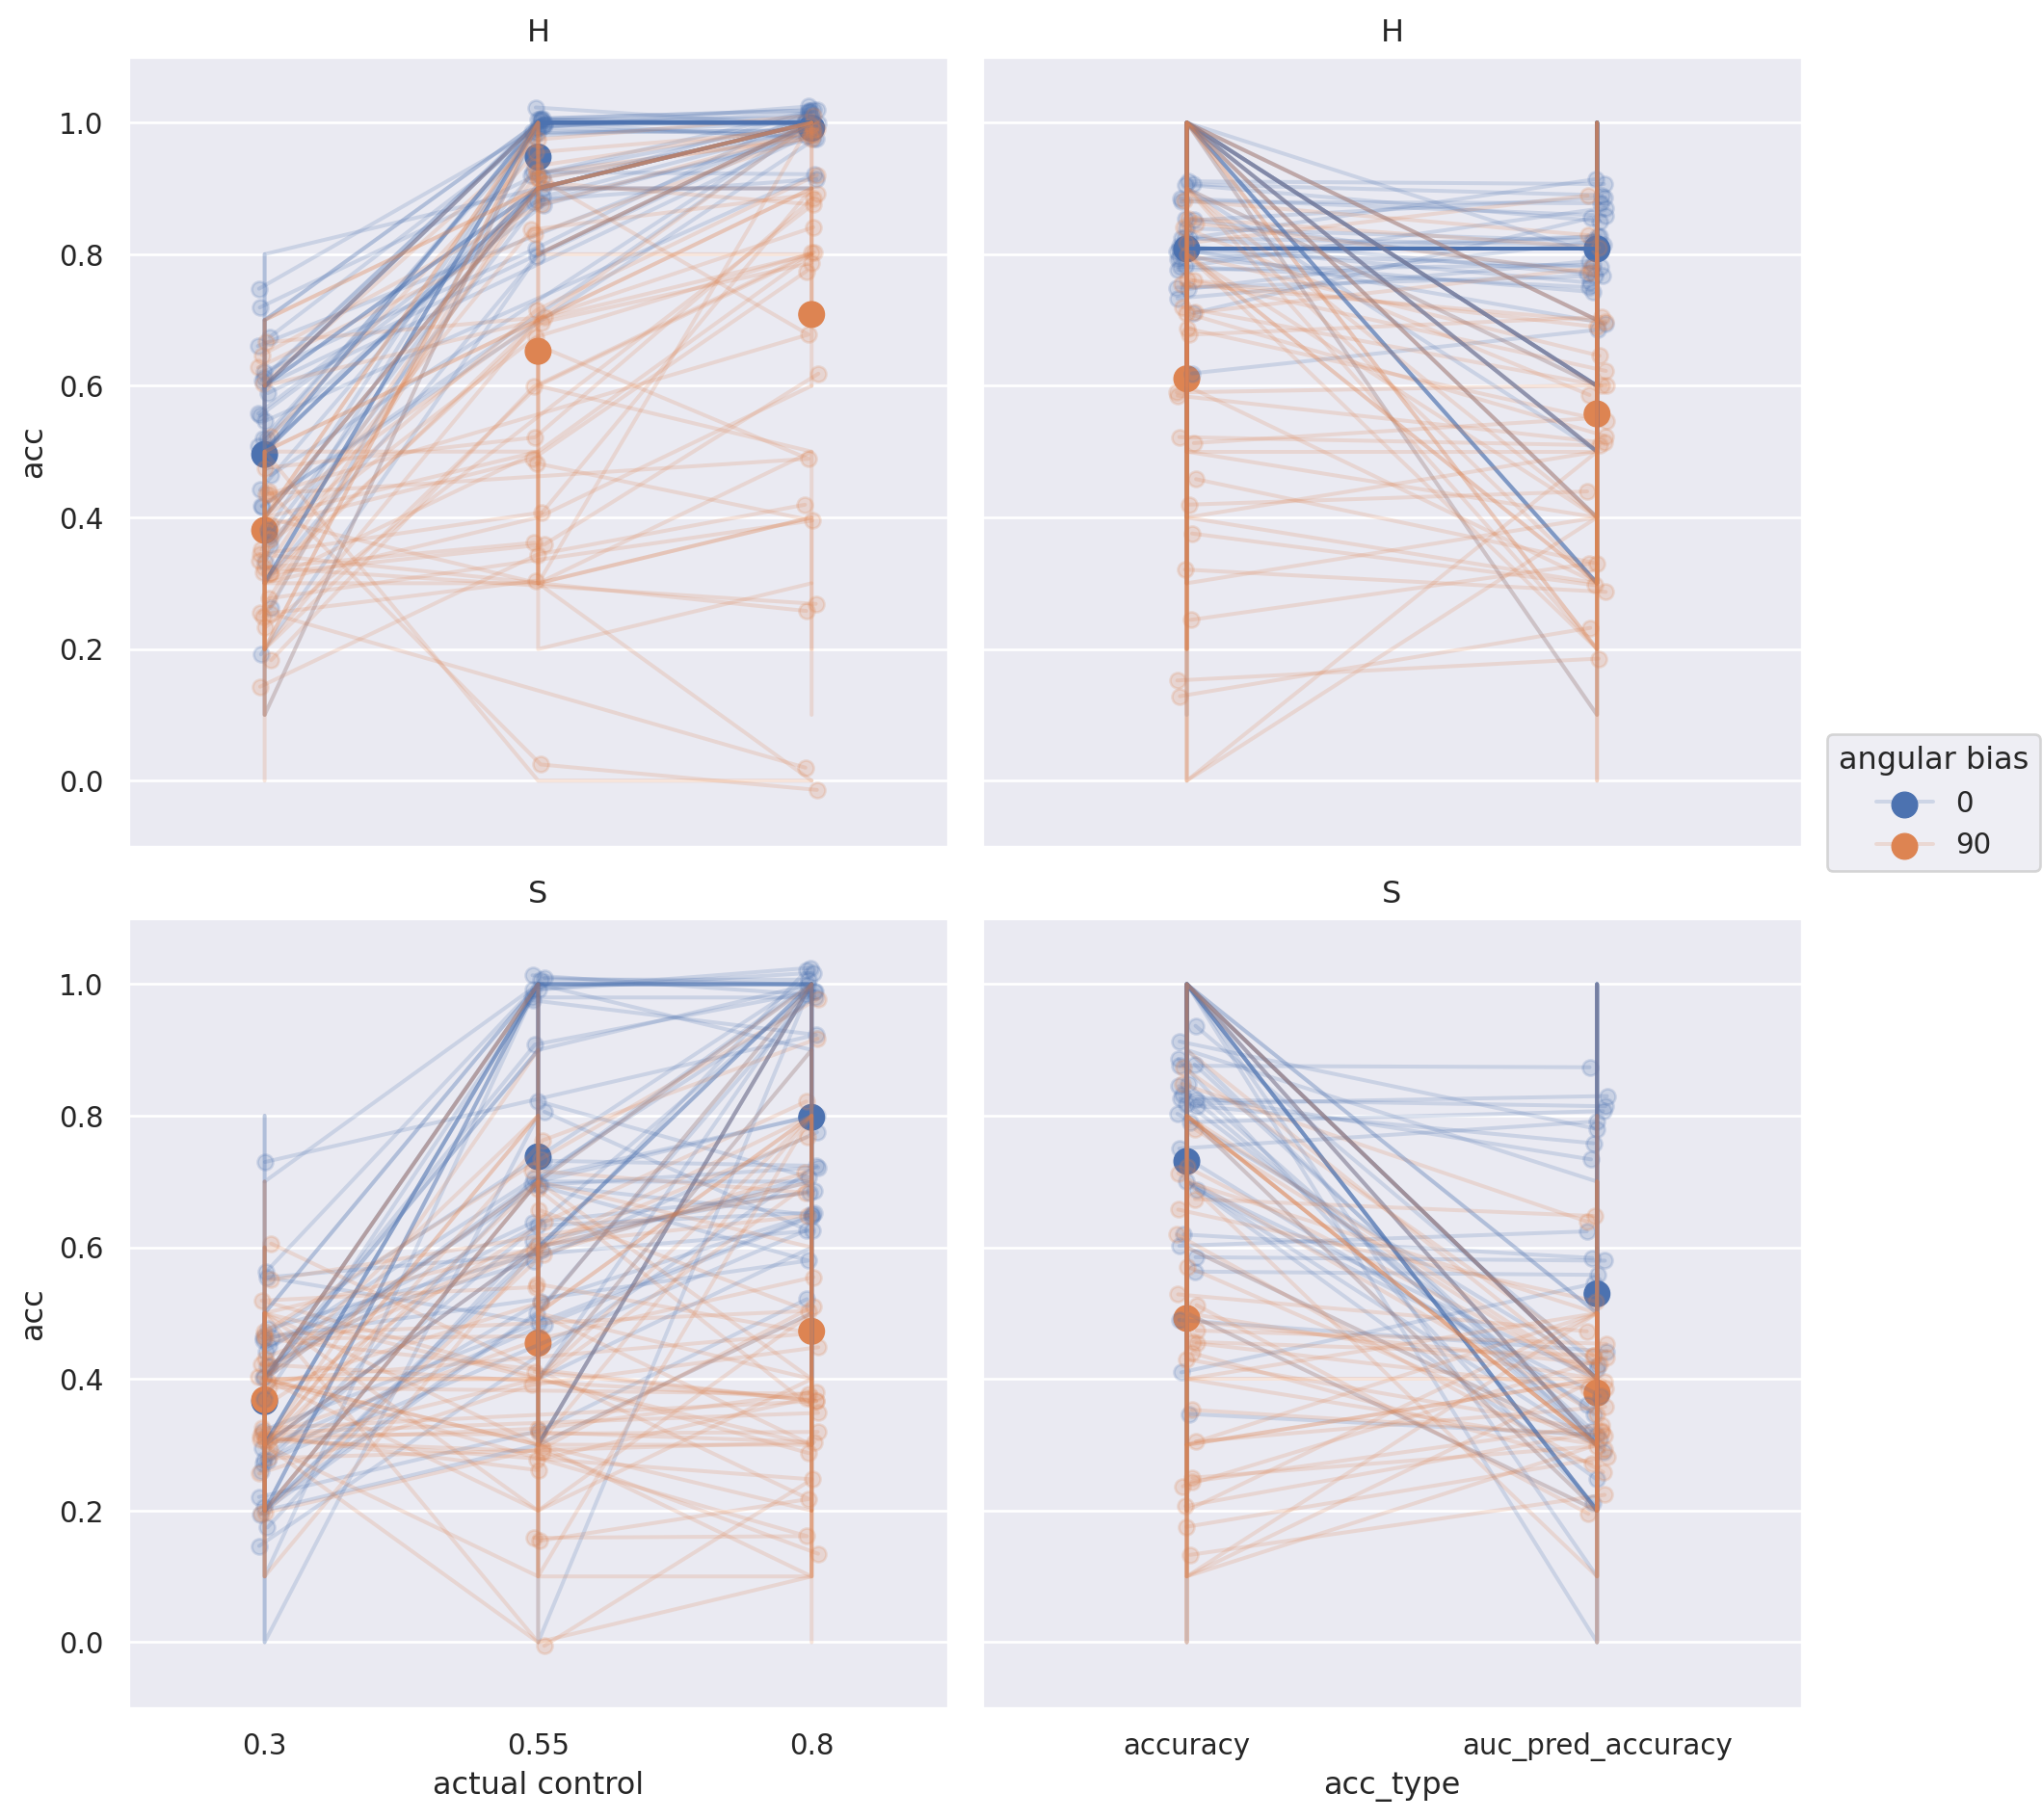

In [36]:
# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['acc', 'actual control', 'angular bias', 'acc_type']
(
    so.Plot(df_, y='acc', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    .pair(x=["actual control", 'acc_type'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='o'), so.Agg(), so.Jitter(x=.05, y=.05), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Dot(pointsize=10), so.Agg(), so.Dodge())
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .add(so.Line(alpha=0.2, marker=''), group="participant")
    .facet(row="group")
    .layout(size=(10, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
    
)